In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# To do

1. Trends over time (over all columns)
2. Common key words in job descriptions (vs time); how that compares to lightcast curated skills
3. Correlate 'green' keywords with skills/occuptations
4. Number of remote jobs 
5. Proportion of software skills over time
6. Education over time
7. SOC2 over time; then look at interesting SOC3 and 4s...
8. 'Holistic' growth of green companies beyond green jobs?
9. Correlations
10. Topic Modelling
11. Extrapolation one year ahead + cross validation (type of job x months) array, entries = number of jobs 




In [18]:
def check_kw_freq(df, kws: list, op = 'or', attr = 'JOB_DESCRIPTION', verbose = False):
    
    kw_booltable = df[attr].str.contains(kws[0])
    for i in range(1, len(kws)):
        if op == 'or':
            kw_booltable =   kw_booltable | df[attr].str.contains(kws[i])
        else:
            kw_booltable =   kw_booltable & df[attr].str.contains(kws[i])
    
    if verbose:
        return kw_booltable
    else:
        return kw_booltable.sum()

In [2]:
postings_data = pd.read_csv('../social_datathon_0/UK_Postings_Sample.csv', low_memory=False)

In [103]:
postings_data.columns

Index([' ', 'POSTED', 'TITLE_NAME', 'SOC_4', 'SOC_4_NAME', 'SOC_3',
       'SOC_3_NAME', 'SOC_2', 'SOC_2_NAME', 'LOT_OCCUPATION_NAME',
       'LOT_CAREER_AREA_NAME', 'CITY_NAME', 'NUTS1_NAME', 'NUTS3_NAME',
       'TTWA_NAME', 'COUNTRY_NAME', 'COMPANY_NAME', 'COMPANY_IS_STAFFING',
       'UK_SIC_2', 'INDUSTRY', 'IS_INTERNSHIP', 'IS_REMOTE',
       'SPECIALIZED_SKILLS_NAME', 'COMMON_SKILLS_NAME', 'SOFTWARE_SKILLS_NAME',
       'CERTIFICATIONS_NAME', 'EDULEVELS_NAME_MIN', 'SALARY',
       'JOB_DESCRIPTION'],
      dtype='object')

In [104]:
postings_data.head()

,,POSTED,TITLE_NAME,SOC_4,SOC_4_NAME,SOC_3,SOC_3_NAME,SOC_2,SOC_2_NAME,LOT_OCCUPATION_NAME,...,INDUSTRY,IS_INTERNSHIP,IS_REMOTE,SPECIALIZED_SKILLS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,CERTIFICATIONS_NAME,EDULEVELS_NAME_MIN,SALARY,JOB_DESCRIPTION
0,820881164.0,2021-08-14,Quality Control Laboratory Supervisors,2111.0,Chemical scientists,211.0,Natural and Social Science Professionals,21.0,"Science, Research, Engineering and Technology ...",NaN,...,Scientific research and development,False,False,"[\n ""High-Performance Liquid Chromatography"",...","[\n ""Management""\n]",[],[],Bachelor's or equivalent,NaN,hplc laboratory supervisor\n\nposted by adzuna...
1,820921812.0,2021-08-14,Education and Government Financial Engagement ...,4159.0,Other administrative occupations n.e.c.,415.0,Other Administrative Occupations,41.0,Administrative Occupations,Office / Administrative Assistant,...,Information service activities,False,False,"[\n ""Target Audience"",\n ""Procurement"",\n ""...","[\n ""Ability To Meet Deadlines"",\n ""Influenc...",[],[],NaN,NaN,government engagement manager\nchiswick\n\ngre...
2,820917873.0,2021-08-14,Permanency Specialists,3513.0,Ship and hovercraft officers,351.0,Transport Associate Professionals,35.0,Business and Public Service Associate Professi...,Ship / Boat Captain,...,Air transport,False,False,"[\n ""Basic Safety Training""\n]","[\n ""Management"",\n ""Consulting""\n]",[],"[\n ""Standards Of Training Certification and ...",NaN,NaN,master (tug) - uk - permanent\n\nposted today ...
3,820965527.0,2021-08-15,Technical Services Administrators,5223.0,Metal working production and maintenance fitters,522.0,"Metal Machining, Fitting and Instrument Making...",52.0,"Skilled Metal, Electrical and Electronic Trades",Repair / Service Technician,...,Food and beverage service activities,False,False,"[\n ""IBM Maximo"",\n ""Statistical Analysis"",\...","[\n ""Customer Service"",\n ""Confident Communi...","[\n ""IBM Maximo""\n]",[],NaN,22500.0,estates & technical services administrator\n\n...
4,820991372.0,2021-08-15,Deputy Team Leaders,4123.0,Bank and post office clerks,412.0,Administrative Occupations: Finance,41.0,Administrative Occupations,Project Manager,...,"Financial service activities, except insurance...",False,False,"[\n ""Health Assessment"",\n ""Auditing""\n]","[\n ""Communications"",\n ""Management"",\n ""Mi...","[\n ""Microsoft Excel""\n]",[],NaN,37988.0,independent audit deputy team leader - (dac)\n...


In [97]:
postings_data['EDULEVELS_NAME_MIN'].isnull().sum()/N_jobs

0.8003019667836538

In [101]:
print(postings_data.loc[0]['JOB_DESCRIPTION'])

hplc laboratory supervisor

posted by adzuna on 11/08/2021

postcode
south west
gloucestershire
gloucester
chipping campden - gl55

company name  adzuna
category  scientific
contract  permanent
full/part time  full time
salary  £ up to £30000 per annum

description

nscg are working in partnership with campden bri in the recruitment of a hplc supervisor. having been established for over 100 years, campden bri is well known for its breadth of services. with over 2,400 member companies, including the top 10 uk retailers and the top 15 global food & beverage manufacturers, clients view the organisation as an extension of their own in-house technical team. reporting to the chromatography section manager, the hplc supervisor will undertake the analysis of samples in the hplc laboratory and all associated activities. management of the of the activities and operation of the hplc group. the role is primarily involved with the analysis of foods (and other matrices as required) by hplc, but can 

In [87]:
postings_data[postings_data['JOB_DESCRIPTION'].isnull()]

,,POSTED,TITLE_NAME,SOC_4,SOC_4_NAME,SOC_3,SOC_3_NAME,SOC_2,SOC_2_NAME,LOT_OCCUPATION_NAME,...,INDUSTRY,IS_INTERNSHIP,IS_REMOTE,SPECIALIZED_SKILLS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,CERTIFICATIONS_NAME,EDULEVELS_NAME_MIN,SALARY,JOB_DESCRIPTION
2299,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
2308,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
2322,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
2712,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
5448,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
5922,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
5953,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
29404,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
32271,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
50789,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN


In [88]:
N_jobs, N_attr = postings_data.shape
print(N_jobs)

100011


In [33]:
for sk in ['SPECIALIZED_SKILLS_NAME', 'COMMON_SKILLS_NAME','SOFTWARE_SKILLS_NAME' ]:
    postings_data[sk] = postings_data[sk].astype(str)

postings_data['POSTED'] = pd.to_datetime(postings_data['POSTED'])
postings_data['JOB_DESCRIPTION'] = postings_data['JOB_DESCRIPTION'].str.lower()

<AxesSubplot:xlabel='POSTED,POSTED'>

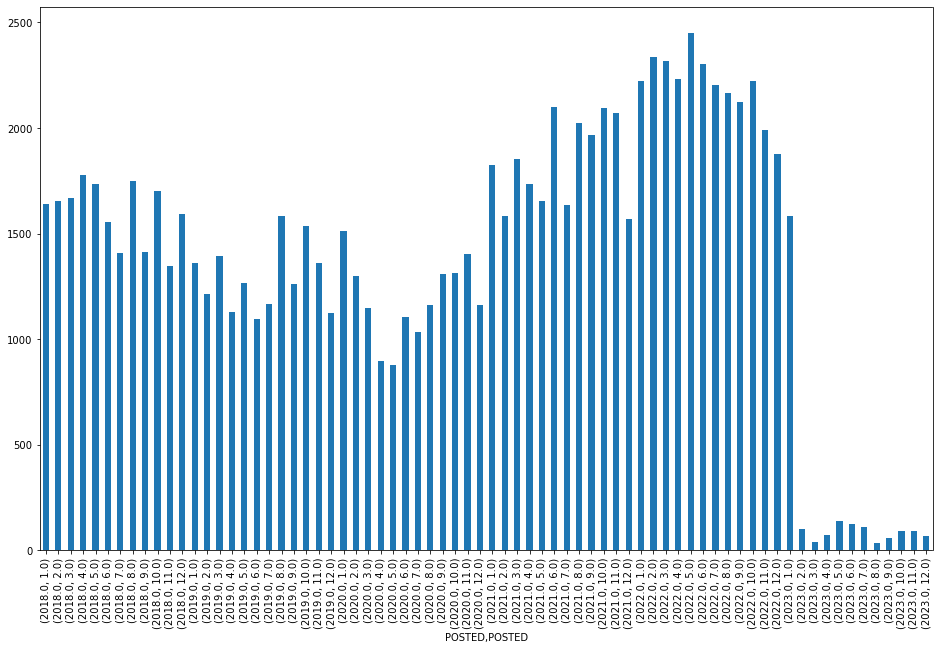

In [37]:
fig = plt.figure(figsize = [16,10])
postings_data['POSTED'].groupby([postings_data['POSTED'].dt.year, postings_data['POSTED'].dt.month]).count().plot(kind="bar")

In [90]:
postings_data[postings_data['POSTED'].dt.year == 2023]

,,POSTED,TITLE_NAME,SOC_4,SOC_4_NAME,SOC_3,SOC_3_NAME,SOC_2,SOC_2_NAME,LOT_OCCUPATION_NAME,...,INDUSTRY,IS_INTERNSHIP,IS_REMOTE,SPECIALIZED_SKILLS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,CERTIFICATIONS_NAME,EDULEVELS_NAME_MIN,SALARY,JOB_DESCRIPTION
593,868753799.0,2023-01-31,Parish Administrators,3561.0,Public services associate professionals,356.0,Public Services and Other Associate Professionals,35.0,Business and Public Service Associate Professi...,Public services associate professionals,...,"Financial service activities, except insurance...",False,True,"[\n ""Organizational Communications"",\n ""Invo...","[\n ""Governance"",\n ""Filing"",\n ""Budgeting""...","[\n ""Microsoft Excel""\n]",[],NaN,23338.0,"admin, secretarial & pasecretarialpermanentpar..."
594,868802408.0,2023-01-31,Primary School Teachers,2314.0,Secondary education teaching professionals,231.0,Teaching and Educational Professionals,23.0,Teaching and Educational Professionals,Middle / High School Teacher,...,"Office administrative, office support and othe...",False,False,"[\n ""Payroll Systems"",\n ""Child Safeguarding...","[\n ""Enthusiasm"",\n ""Leadership"",\n ""Teachi...","[\n ""Payroll Systems""\n]",[],NaN,NaN,primary school teachers & secondary school tea...
595,868785156.0,2023-01-31,Wait Staff,9273.0,Waiters and waitresses,927.0,Other Elementary Services Occupations,92.0,Elementary Administration and Service Occupations,Waiter / Waitress,...,Food and beverage service activities,False,False,"[\n ""Money Management"",\n ""Restaurant Operat...",[],[],[],NaN,16650.0,waiter/waitress\njob details\nposting date:\t3...
596,868751352.0,2023-01-31,Product Development Product Managers,1134.0,Advertising and public relations directors,113.0,Functional Managers and Directors,11.0,Corporate Managers and Directors,Communications / Public Relations Manager,...,NaN,False,False,"[\n ""Salesforce"",\n ""Power BI"",\n ""Code Rev...","[\n ""Writing"",\n ""Information Technology"",\n...","[\n ""Software Systems"",\n ""Powerapps"",\n ""A...",[],NaN,NaN,"product director,citizen development product l..."
597,868808318.0,2023-01-31,Shift Engineers,2129.0,Engineering professionals n.e.c.,212.0,Engineering Professionals,21.0,"Science, Research, Engineering and Technology ...",NaN,...,"Financial service activities, except insurance...",False,False,"[\n ""Technical Recruitment"",\n ""Laminated Ve...","[\n ""Packaging And Labeling"",\n ""Operations""\n]",[],[],A-levels or equivalent,NaN,shift engineer posted today by location: leigh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99905,866899137.0,2023-09-01,Motor Vehicle Technicians,2319.0,Teaching and other educational professionals n...,231.0,Teaching and Educational Professionals,23.0,Teaching and Educational Professionals,Tutor,...,"Financial service activities, except insurance...",False,False,[],"[\n ""Teaching""\n]",[],[],Up to GCSEs or equivalent,28000.0,"motor vehicle tutor bury from 28,000 a year - ..."
99906,866893054.0,2023-09-01,Workshop Specialists,3115.0,Quality assurance technicians,311.0,"Science, Engineering and Production Technicians",31.0,"Science, Engineering and Technology Associate ...",Quality Inspector / Technician,...,"Financial service activities, except insurance...",False,False,"[\n ""Financial Advising"",\n ""Purchasing"",\n ...","[\n ""Management"",\n ""Coaching"",\n ""Innovati...",[],[],NaN,NaN,workshop quality specialist - porsche sidcup 2...
99907,866891659.0,2023-09-01,Volunteer Organizers,3313.0,Fire service officers (watch manager and below),331.0,Protective Service Occupations,33.0,Protective Service Occupations,Firefighter,...,"Financial service activities, except insurance...",False,False,"[\n ""Housekeeping""\n]","[\n ""Sorting"",\n ""Empathy""\n]",[],[],NaN,NaN,volunteer clothing organiser southend-on-sea v...
99908,866890575.0,2023-09-01,Account Assistants,4122.0,"Book-keepers, payroll managers and wages clerks",412.0,Administrative Occupati

In [9]:
no_no_spec_skills = (postings_data['SPECIALIZED_SKILLS_NAME'].apply(lambda x: len(x)) == 2).sum()
no_no_common_skills = (postings_data['COMMON_SKILLS_NAME'].apply(lambda x: len(x)) == 2).sum()
no_no_software_skills = (postings_data['SOFTWARE_SKILLS_NAME'].apply(lambda x: len(x)) == 2).sum()

In [85]:
no_job_descr = postings_data['JOB_DESCRIPTION'].apply(empty_job_descr).sum()
print(no_job_descr)

11


In [82]:
def empty_job_descr(w: str):
    if type(w) == str:
        if len(w) == 0:
            return True
        else:
            return False
    elif type(w) == float:
        return math.isnan(w)

In [84]:
print(no_no_spec_skills/N_jobs, no_no_common_skills/N_jobs, no_no_software_skills/N_jobs, no_job_descr/N_jobs)

0.09369969303376628 0.19460859305476397 0.7477777444481107 0.00010998790133085361


In [15]:
postings_data.LOT_OCCUPATION_NAME.unique()

array([nan, 'Office / Administrative Assistant', 'Ship / Boat Captain',
       'Repair / Service Technician', 'Project Manager',
       'Systems Analyst', 'Pharmacist / Pharmacy Director',
       'Customer Service Representative', 'Sales Representative',
       'Bookkeeper / Accounting Clerk', 'Program Manager',
       'Data / Data Mining Analyst', 'Surgical Technician / Technologist',
       'Carpenter', 'Computer Support Specialist',
       'Storage / Distribution Manager', 'Elementary School Teacher',
       'Regulatory Affairs Specialist',
       'Environmental Planner / Scientist', 'Retail Sales Associate',
       'Social / Human Service Assistant', 'HVAC Mechanic / Installer',
       'Family / School / General Social Worker',
       'Account Manager / Representative',
       'Dentist / Orthodontist / Prosthodontist', 'Finance Assistant',
       'Personal Trainer / Fitness Instructor', 'Coach',
       'Emergency Management Director', 'Attorney', 'Nursing Assistant',
       'Caregi

In [13]:
postings_data.LOT_CAREER_AREA_NAME.unique()

array([nan, 'Clerical and Administrative', 'Transportation',
       'Maintenance, Repair, and Installation',
       'Business Management and Operations', 'Information Technology',
       'Health Care including Nursing', 'Customer and Client Support',
       'Sales', 'Finance', 'Planning and Analysis',
       'Construction, Extraction, and Architecture',
       'Education and Training', 'Science and Research',
       'Community and Social Services',
       'Law, Compliance, and Public Safety', 'Design, Media, and Writing',
       'Engineering', 'Hospitality, Food, and Tourism',
       'Marketing and Public Relations', 'Human Resources',
       'Manufacturing and Production',
       'Agriculture, Horticulture, & the Outdoors', 'Personal Services',
       'Performing Arts', 'Military'], dtype=object)

In [91]:
kws_list = [['green'], ['climate', 'climate-change', 'global warming'], ['renewable', 'renewables'], 
            ['renewable', 'wind power', 'wind energy', 'wind turbine', 'wind turbines','solar power', 'solar energy', 'solar panels','solar panel', 'geothermal power', 'geothermal energy', 'tidal power', 'tidal energy'], 
            ['battery', 'batteries'], ['sustainable', 'sustainability'], ['carbon', 'low-carbon', 'carbon-neutral'], ['greenhouse', 'green house']]
kws_freq = [check_kw_freq(postings_data, kws) for kws in kws_list]

In [93]:
for idx, kws in enumerate(kws_list):
    print(kws, kws_freq[idx])

['green'] 2764
['climate', 'climate-change', 'global warming'] 592
['renewable', 'renewables'] 659
['renewable', 'wind power', 'wind energy', 'wind turbine', 'wind turbines', 'solar power', 'solar energy', 'solar panels', 'solar panel', 'geothermal power', 'geothermal energy', 'tidal power', 'tidal energy'] 704
['battery'] 163
['sustainable', 'sustainability'] 3103
['carbon', 'low-carbon', 'carbon-neutral'] 762
['greenhouse', 'green house'] 48
